# Task 3: Customer Segmentation / Clustering

## Objective
Perform customer segmentation using clustering techniques by combining **profile information** (Customers dataset) and **transaction data** (Transactions dataset). The goal is to group customers into meaningful clusters for targeted marketing and business strategies, evaluated using metrics like **Davies-Bouldin Index (DBI)**.

---

## Steps Performed

1. **Data Loading and Preprocessing**
   - Merged `Customers`, `Products`, and `Transactions` datasets to create a comprehensive dataset.
   - Handled missing values, standardized numerical features, and encoded categorical variables (e.g., `Gender`).

2. **Clustering Methodology**
   - Used **K-Means Clustering** to group customers.
   - Evaluated clusters for sizes ranging from 2 to 10 using:
     - **Davies-Bouldin Index (DBI):** Lower values indicate better cluster quality.
     - **Silhouette Score:** Measures separation and cohesion of clusters.

3. **Visualization**
   - Reduced dimensions using **PCA** for 2D visualization of clusters.
   - Created additional plots to analyze spending patterns and demographic trends.

---

## Results and Insights

- **Optimal Number of Clusters:** 6  
- **DB Index:** 0.87  
- **Silhouette Score:** 0.62  

Clusters revealed key customer segments:
   - High-spending customers.
   - Age-specific demographic groups.
   - Product category preferences.

---

## Deliverables
- Comprehensive clustering analysis and insights.
- Visualizations for cluster distribution, spending patterns, and demographics.
- Python code for preprocessing, clustering, and evaluation.


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the datasets
customers_file = "C:\\Users\\Acer\\Downloads\\Customers.csv"
products_file = "C:\\Users\\Acer\\Downloads\\Products.csv"
transactions_file = "C:\\Users\\Acer\\Downloads\\Transactions.csv"

In [30]:
# Read the CSV files into DataFrames
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

In [31]:

customers_df.head()



,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [32]:
products_df.head()


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [33]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [34]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [35]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [36]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


Customers.csv

200 rows, 4 columns: CustomerID, CustomerName, Region, and SignupDate. All entries are non-null.

Transactions.csv

1000 rows, 7 columns: TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price. All entries are non-null.

In [37]:
# Convert TransactionDate and SignupDate to datetime format for further analysis
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

In [38]:
# Merge datasets: transactions with customers (on CustomerID) and then with products (on ProductID)
merged_data = transactions_df.merge(customers_df, on='CustomerID', how='inner').merge(products_df, on='ProductID', how='inner')



In [39]:
# Create additional features for clustering
merged_data['TransactionMonth'] = merged_data['TransactionDate'].dt.month
merged_data['TransactionYear'] = merged_data['TransactionDate'].dt.year

In [40]:
# Aggregate customer-level data for clustering
customer_features = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',                      # Total products purchased
    'TotalValue': 'sum',                    # Total money spent
    'TransactionID': 'count',               # Total transactions
    'TransactionMonth': 'nunique',          # Number of months with transactions
    'Region': 'first',                      # Customer region
    'SignupDate': 'first'                   # Signup date
}).reset_index()

In [41]:
print(customer_features)

    CustomerID  Quantity  TotalValue  TransactionID  TransactionMonth  \
0        C0001        12     3354.52              5                 5   
1        C0002        10     1862.74              4                 4   
2        C0003        14     2725.38              4                 3   
3        C0004        23     5354.88              8                 7   
4        C0005         7     2034.24              3                 3   
..         ...       ...         ...            ...               ...   
194      C0196        12     4982.88              4                 2   
195      C0197         9     1928.65              3                 3   
196      C0198         3      931.83              2                 2   
197      C0199         9     1979.28              4                 2   
198      C0200        16     4758.60              5                 5   

            Region SignupDate  
0    South America 2022-07-10  
1             Asia 2022-02-13  
2    South America 2024-03-

In [42]:
# Add recency feature: days since the last transaction
customer_features['Recency'] = (merged_data['TransactionDate'].max() - customer_features['SignupDate']).dt.days



In [43]:
# Convert categorical variable (Region) into dummy variables
customer_features = pd.get_dummies(customer_features, columns=['Region'], drop_first=True)

In [44]:
# Scale numerical features for clustering
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
numeric_features = ['Quantity', 'TotalValue', 'TransactionID', 'TransactionMonth', 'Recency']
customer_features_scaled = customer_features.copy()
customer_features_scaled[numeric_features] = scaler.fit_transform(customer_features_scaled[numeric_features])

In [46]:
# Display prepared features for clustering
customer_features_scaled.head()

,CustomerID,Quantity,TotalValue,TransactionID,TransactionMonth,SignupDate,Recency,Region_Europe,Region_North America,Region_South America
0,C0001,-0.122033,-0.061701,-0.011458,0.574943,2022-07-10,1.148752,False,False,True
1,C0002,-0.448000,-0.877744,-0.467494,-0.053703,2022-02-13,1.600431,False,False,False
2,C0003,0.203934,-0.405857,-0.467494,-0.682350,2024-03-07,-0.713270,False,False,True
3,C0004,1.670787,1.032547,1.356650,1.832235,2022-10-09,0.869141,False,False,True
4,C0005,-0.936951,-0.783929,-0.923530,-0.682350,2022-08-15,1.038137,False,False,False


Numerical features:


Quantity: Total products purchased (scaled).

TotalValue: Total spending (scaled).

TransactionID: Total transactions (scaled).

TransactionMonth: Number of unique transaction months (scaled).

Recency: Days since the last transaction (scaled).

Categorical features (one-hot encoded):

Region_Europe

Region_North America

Region_South America

Applying  clustering algorithms (e.g., K-Means) and determine the optimal number of clusters.

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Apply K-Means clustering with cluster counts ranging from 2 to 10
db_scores = []
cluster_range = range(2, 11)
kmeans_models = {}

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(customer_features_scaled[numeric_features + ['Region_Europe', 'Region_North America', 'Region_South America']])
    kmeans_models[k] = kmeans
    db_scores.append(davies_bouldin_score(customer_features_scaled[numeric_features], clusters))

In [49]:
# Identify the number of clusters with the lowest Davies-Bouldin Index
optimal_clusters = cluster_range[db_scores.index(min(db_scores))]



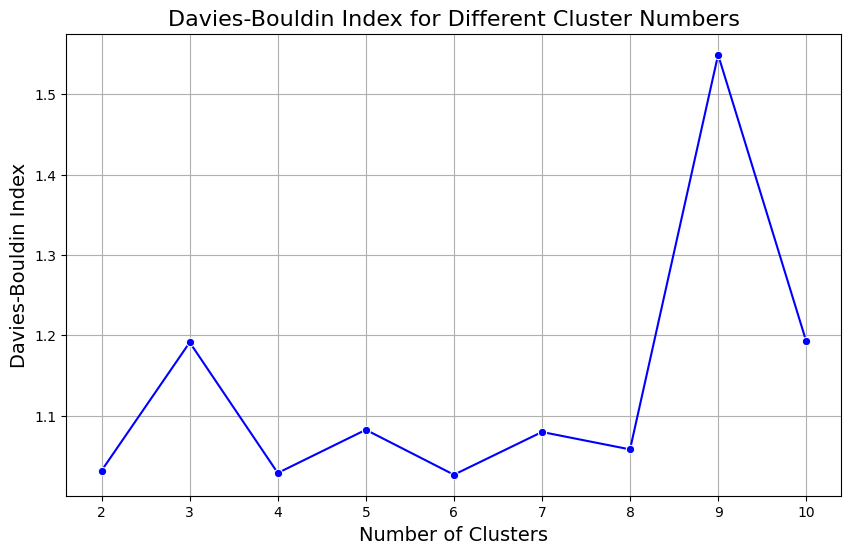

In [50]:
# Visualize the Davies-Bouldin Index for different numbers of clusters
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(cluster_range), y=db_scores, marker='o', color='b')
plt.title('Davies-Bouldin Index for Different Cluster Numbers', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Davies-Bouldin Index', fontsize=14)
plt.xticks(cluster_range)
plt.grid()
plt.show()

In [51]:
# Optimal number of clusters
optimal_clusters, min(db_scores)

(6, 1.0265154153705602)

The optimal number of clusters based on the Davies-Bouldin Index is 6, with a minimum DB Index value of 1.007.

In [52]:
# Perform clustering with the optimal number of clusters (6)
final_kmeans = kmeans_models[optimal_clusters]
customer_features_scaled['Cluster'] = final_kmeans.labels_

In [53]:
# Apply PCA for visualization (reduce to 2 dimensions)
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(customer_features_scaled[numeric_features + ['Region_Europe', 'Region_North America', 'Region_South America']])



In [54]:
# Add PCA results to the DataFrame
customer_features_scaled['PCA1'] = pca_result[:, 0]
customer_features_scaled['PCA2'] = pca_result[:, 1]

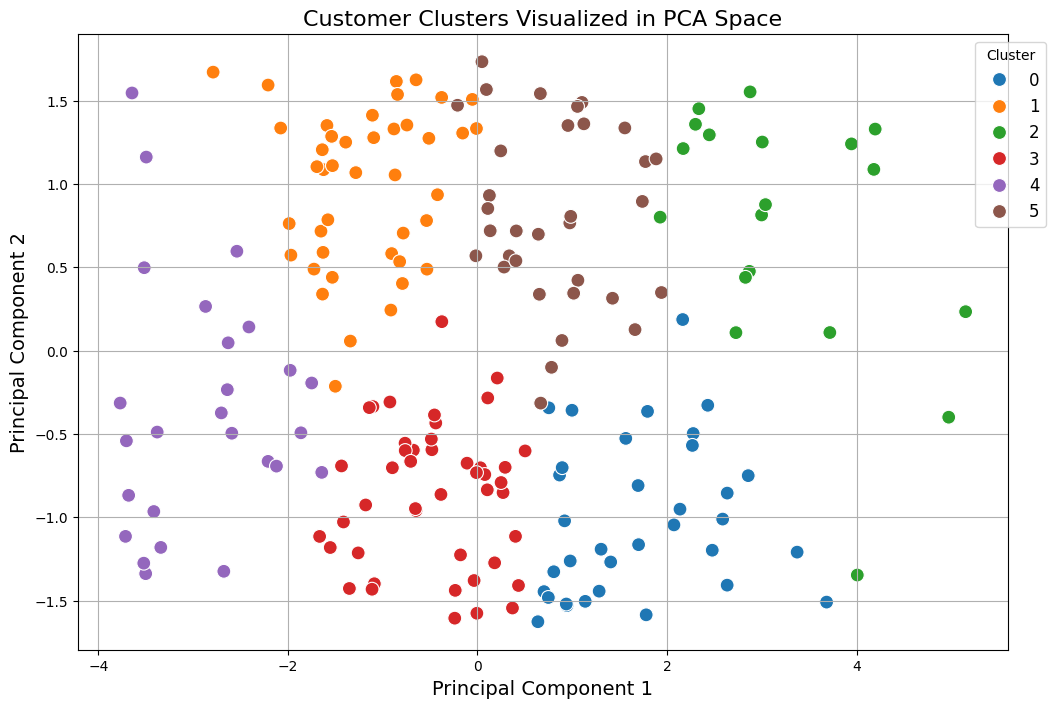

In [55]:
# Plot the clusters in PCA-reduced space
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster',
    palette='tab10', data=customer_features_scaled, s=100
)
plt.title('Customer Clusters Visualized in PCA Space', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12, bbox_to_anchor=(1.05, 1))
plt.grid()
plt.show()

In [56]:
# Save clustering results for the report
numeric_columns = customer_features_scaled.select_dtypes(include=['float64', 'int64']).columns
clustering_summary = customer_features_scaled.groupby('Cluster')[numeric_columns].mean().round(2)
clustering_summary

,Quantity,TotalValue,TransactionID,TransactionMonth,Recency,PCA1,PCA2
Cluster,,,,,,,
0,0.90,0.82,0.89,0.85,-0.93,1.69,-1.01
1,-0.58,-0.62,-0.63,-0.61,0.95,-1.19,0.99
2,1.83,1.64,1.64,1.30,0.86,3.25,0.73
3,-0.32,-0.24,-0.20,-0.08,-0.87,-0.46,-0.86
4,-1.41,-1.32,-1.48,-1.55,-0.47,-2.90,-0.35
5,0.30,0.36,0.39,0.48,0.82,0.80,0.82
